In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import linalg

In [15]:
def runge_kutta(uk,dt):
    
    y1 = f_true(uk)
    y2 = f_true(uk+1/2*dt*y1)
    y3 = f_true(uk+1/2*dt*y2)
    y4 = f_true(uk+dt*y3)
    
    uk_plus_one = uk + 1/6 * dt * (y1 + 2*y2 + 2*y3 + y4)
    
    return uk_plus_one

In [1]:
def am3(u_0,T,delta_t):
    time = np.arange(0, T + delta_t, delta_t)
    u = np.zeros([len(time), len(u_0)])
    for i in range(len(time)):
        if i == 0:
            u[0] = u_0 
        elif i == 1:
            u[1] = runge_kutta(u[0], delta_t)
        elif i == 2:
            u[2] = runge_kutta(u[1], delta_t)# why using runge kutta and not AB2?
        elif(i > 2):
            #u[i] = u_k+1
            #u[i-1] = u_k
            #u[i-2] = u_k-1
            #u[i-3] = u_k-2         
            u[i] = u[i-1] + delta_t/24 * (
                f_true(u[i-3]) - 5*f_true(u[i-2]) + 19*f_true(u[i-1]) + 9*f_true(u[i]) 
            )
    return u,time

# scratch work

In [9]:


import numpy as np
T = 50
dt = .01
time = np.arange(0, T + dt, dt)
x = np.array([[0, 1,2],
            [5,6,7]])
xx = np.zeros([len(time), len(x)])


5001

In [19]:
# AM3 Method from the difference equation stuff


def am3_diffeq(u_0,a,b,N):
    '''
    takes in:
    u_0 : initial point
    a   : time interval start
    b   : time interval end
    N   : number of steps
    '''
    h = (b-a)/N
    t = np.arange(a,b+h,h)
    u = np.zeros(len(t))
    u[0] = u_0
    u[1] = runge_kutta(u[0], h)
    u[2] = runge_kutta(u[1], h)
    for i in range(2,N):
        u[i+1] = ( u[i] +
                  h/24 * (9*t[i+1] + 
                         + 19*t[i] - 19*u[i]
                         - 5*t[i-1] + 5*u[i-1]
                         + t[i-2] + u[i-2])
        ) / (1 + 9*h/24)
        
    return u, t

In [20]:
f = f_true
u_0 = np.array([1, 1])
print(f_true(u_0))
u, times = am3_diffeq(u_0, 0,5, 50)

[ 1 -2]


ValueError: setting an array element with a sequence.

In [ ]:
delay
ffreak
cause
saute
dream
pantblackallow


In [38]:
#Backwards Euler (Implicit) Method
def beuler(u_0,T,dt):
#     h = abs(tn-t0)/n
#     t = linspace(0,tn,n+1)
    
    h = dt
    times = np.arange(0,T+dt,dt)
    n = len(times)-1
    y = zeros(n+1)
    y[0] = y0
    for k in range(0,n):
        err = 1
        zold = y[k] + h*f(t[k],y[k]) #Use Forward Euler for initial guess 
        I=0
        #Use Newton’s Method to solve implicit equation for y[k+1]
        while err > 10**(-10) and I < 5: #NM is limited to 5 iterations
                F  = y[k] + h*f(t[k+1],zold)-zold
                dF = h*dfy(t[k+1],zold)-1
                znew = zold - F/dF
                err = abs(znew-zold)
                zold = znew
                I +=1
        y[k+1] = znew
    return y

In [14]:
def am4(u_0,T,delta_t):
    time = np.arange(0, T + delta_t, delta_t)
    u = np.zeros([len(time), len(u_0)])
    for i in range(len(time)):
        if i == 0:
            u[0] = u_0 
        elif i == 1:
            u[1] = runge_kutta(u[0], delta_t)
        elif i == 2:
            u[2] = runge_kutta(u[1], delta_t)
        elif i == 3:
            u[3] = runge_kutta(u[2], delta_t)    
        elif(i > 2):
            #u[i] = u_k+1
            #u[i-1] = u_k
            #u[i-2] = u_k-1
            #u[i-3] = u_k-2  
            #u[i-4] = u_k-3
            u[i] = u[i-1] + delta_t/720 * (
                -19* f_true(u[i-4]) + 106*f_true(u[i-3]) - 264*f_true(u[i-2]) + 646*f_true(u[i-1]) + 251*f_true(u[i]) 
            )
    return u,time

In [17]:
def f_true(u, b=2, p=1, g=1, d=3):
    """Returns the output dynamics vector for a given u and t for the Lotka-Volterra model. I.e., returns u_dot = f(u, t). 
    
    Parameters
    ----------
    u : array_like
        Current state vector [u0, u1] = [number of prey, number of predators]
    b : float_like
        Birth rate of prey
    p : float_like
        effect of predators on prey
    g : float_like
        Population growth of predators due to consumption of prey
    d : float_like
        Death rate of predators due to natural circumstances
        
    Returns
    -------
    u_dot : array
        Vector of output dynamics for a given u and t, where the first element represents prey dynamics and the second element represent predator dynamics [u_dot1, u_dot2]
    
    """

    ### YOUR CODE HERE ###
    du_0 = (b - p*u[1]) * u[0]
    du_1 = (g*u[0] - d) * u[1]
    
    u_dot = np.array([du_0,du_1])
    return u_dot

In [37]:
f = f_true
u_0 = np.array([1, 1])
T = 50
delta_t = 5e-2
u, times = PreCorr3(u_0, T, delta_t)

# check output
u_final_solution = [6.39420193, 0.85162253]
print('solution u[K,:]: ', u_final_solution)
print('output u[K,:]: ', u[-1,:])
#np.testing.assert_allclose(u[-1,:], u_final_solution)
# print('TESTS PASSED')

IndexError: index 1001 is out of bounds for axis 0 with size 1001

In [7]:
#Your Answer here
def f_true_no_drag(u):
    """Returns the output dynamics vector for a given u and t for the Lotka-Volterra model. I.e., returns u_dot = f(u, t). 
    
    Parameters
    ----------
    u : array_like
        Current state vector [u0, u1] = [number of prey, number of predators]
        
    Returns
    -------
    u_dot : array
        Vector of output dynamics for a given u and t, where the first element represents prey dynamics and the second element represent predator dynamics [u_dot1, u_dot2]
    
    """

    ### YOUR CODE HERE ###
    g = 9.81
    u_dot = np.array([u[2],u[3],0,-g])
    return u_dot

In [8]:
def analytical_solution(u0,T):
    ''' s and v are vectors '''
    
    x0 = u0[0]
    y0 = u0[1]
    vx = u0[2]
    vy = u0[3]
    
    g = 9.81
    xf = x0 + vx*T
    yf = y0 + vy*T + 1/2 * -g * T**2
    vxf = vx
    vyf = vy + -g*T
    
    uf = [xf,yf,vxf,vyf]
    
    
    return uf

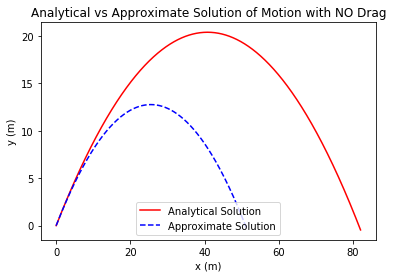

In [10]:
f_true = f_true_no_drag
T = 4.1
dt = .001
times = np.arange(0,T+dt,dt)

u0 = [0,0,20,20]
# plot analytical
solx = []
soly = []
for i in times:
    uf =analytical_solution(u0,i)
    solx.append(uf[0])
    soly.append(uf[1])
plt.plot(solx,soly,'r-', label = 'Analytical Solution')

# plot approx
u,times = am3(u0,T,dt)
plt.plot(u[:,0],u[:,1], 'b--', label = 'Approximate Solution')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Analytical vs Approximate Solution of Motion with NO Drag')
plt.show()